# Cleaner

## Comprobation of the dirty dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('recieved_dirty_dataset.csv')
df.head()

,Esto_debe_SER_ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type_1,Tipo_Principal
0,1,Bulbasaur,0.7,6.9,45.0,49.0,49,65,65,Grass,NaN
1,2,Ivysaur,1000.0,13.0,60.0,62.0,63,80,80,Grass,NaN
2,3,Venusaur,2.0,100.0,80.0,82.0,83,100,100,Grass,Grassindo no es grassindo
3,4,Charmander,0.6,8.5,39.0,52.0,43,60,50,Fire,Categoria_extra
4,5,Charmeleon,1.1,19.0,58.0,64.0,58,80,65,Fire,NaN


## Searching errors

### Incorrect headers

- I will rename `Esto_debe_SER_ID`, `Type_1` and `Weight{kg}` to a better names like `ID`, `Type` and `Weight(kg)`

In [59]:
df.rename(columns={'Esto_debe_SER_ID': 'ID','Type_1': 'Type','Weight{kg}':'Weight(kg)'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          150 non-null    int64  
 1   Name        150 non-null    object 
 2   Height(m)   150 non-null    float64
 3   Weight(kg)  150 non-null    float64
 4   HP          150 non-null    float64
 5   Attack      150 non-null    float64
 6   Defense     150 non-null    int64  
 7   Sp.Atk      150 non-null    int64  
 8   Sp.Def      150 non-null    int64  
 9   Type        150 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 17.0+ KB


### Remove useless columns

- It only have 2 values that doesn't aport in the dataset so i will erase the column `Tipo_Principal`

In [ ]:
print(df['Tipo_Principal'].unique())

array([nan, 'Grassindo no es grassindo', 'Categoria_extra'], dtype=object)

In [7]:
df.drop(columns=['Tipo_Principal'], inplace=True)
df.head()

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type
0,1,Bulbasaur,0.7,6.9,45.0,49.0,49,65,65,Grass
1,2,Ivysaur,1000.0,13.0,60.0,62.0,63,80,80,Grass
2,3,Venusaur,2.0,100.0,80.0,82.0,83,100,100,Grass
3,4,Charmander,0.6,8.5,39.0,52.0,43,60,50,Fire
4,5,Charmeleon,1.1,19.0,58.0,64.0,58,80,65,Fire


### Remove duplicated rows

In [15]:
print(df.duplicated().value_counts())
df.duplicated()

False    151
True       1
Name: count, dtype: int64


0      False
1      False
2      False
3      False
4      False
       ...  
147    False
148    False
149    False
150     True
151    False
Length: 152, dtype: bool

In [20]:
df.drop_duplicates(inplace=True)
print(df.duplicated().value_counts())

False    151
Name: count, dtype: int64


- Now I will search for the parcial duplicated rows

In [25]:
df[df.duplicated(subset=['ID'], keep=False)]

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type
1,2,Ivysaur,1000.0,13.0,60.0,62.0,63,80,80,Grass
151,2,Ivysaur_Partial_Dup,1.0,13.0,999.0,62.0,63,80,80,Grass


In [28]:
df.drop_duplicates(subset=['ID'], inplace=True)
df.query('ID == 2')

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type
1,2,Ivysaur,1000.0,13.0,60.0,62.0,63,80,80,Grass


In [23]:
df[df.duplicated(subset=['Name'], keep=False)]

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          150 non-null    int64  
 1   Name        150 non-null    object 
 2   Height(m)   150 non-null    float64
 3   Weight{kg}  150 non-null    float64
 4   HP          149 non-null    float64
 5   Attack      149 non-null    float64
 6   Defense     150 non-null    int64  
 7   Sp.Atk      150 non-null    object 
 8   Sp.Def      150 non-null    int64  
 9   Type        150 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 12.9+ KB


### Check missing values

- The previus ```df.info()``` show me that HP and Attack have 1 value NaN so I will check it and see what to do

In [32]:
df.isna().sum()

ID            0
Name          0
Height(m)     0
Weight{kg}    0
HP            1
Attack        1
Defense       0
Sp.Atk        0
Sp.Def        0
Type          0
dtype: int64

In [33]:
df[df.isna().any(axis=1)]

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type
7,8,Wartortle,1.0,22.5,NaN,63.0,80,65,80,Water
12,13,Weedle,0.3,3.2,40.0,NaN,30,20,20,Bug


- i will fill HP and Attack based on the median of their respective types

In [ ]:
df['HP'] = df['HP'].fillna(df.groupby('Type')['HP'].transform('median'))
df.query('ID == 8')
## In reality, he have 59 HP, but for the sake of the challenge, we will leave it like this.

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type
7,8,Wartortle,1.0,22.5,60.0,63.0,80,65,80,Water


In [37]:
df['Attack'] = df['Attack'].fillna(df.groupby('Type')['Attack'].transform('median'))
df.query('ID == 13')

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type
12,13,Weedle,0.3,3.2,40.0,65.0,30,20,20,Bug


In [38]:
df.isna().sum()

ID            0
Name          0
Height(m)     0
Weight{kg}    0
HP            0
Attack        0
Defense       0
Sp.Atk        0
Sp.Def        0
Type          0
dtype: int64

### Correcting formatting and data types

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          150 non-null    int64  
 1   Name        150 non-null    object 
 2   Height(m)   150 non-null    float64
 3   Weight{kg}  150 non-null    float64
 4   HP          150 non-null    float64
 5   Attack      150 non-null    float64
 6   Defense     150 non-null    int64  
 7   Sp.Atk      150 non-null    object 
 8   Sp.Def      150 non-null    int64  
 9   Type        150 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 17.0+ KB


- Special Atk has the object type that doesn't makes sense whatching that Sp.Def is int

In [ ]:
df['Sp.Atk'] = df['Sp.Atk'].astype(int)

ValueError: invalid literal for int() with base 10: '$50'

In [51]:
df['Sp.Atk'] = df['Sp.Atk'].astype(str).str.replace('$', '')
df['Sp.Atk'] = df['Sp.Atk'].astype(int)
df[df['Sp.Atk'] == 50]

,ID,Name,Height(m),Weight{kg},HP,Attack,Defense,Sp.Atk,Sp.Def,Type
6,7,Squirtle,0.5,9.0,44.0,48.0,65,50,64,Water
15,16,Pidgey,0.3,1.8,40.0,45.0,40,50,35,Normal
16,17,Pidgeotto,1.1,30.0,63.0,60.0,55,50,50,Normal
19,20,Raticate,0.7,18.5,55.0,81.0,60,50,70,Normal
24,25,Pikachu,0.4,6.0,35.0,55.0,40,50,50,Electric
36,37,Vulpix,0.6,9.9,38.0,41.0,40,50,65,Fire
50,51,Dugtrio,0.7,33.3,35.0,100.0,50,50,70,Ground
60,61,Poliwhirl,1.0,20.0,65.0,65.0,65,50,50,Water
66,67,Machoke,1.5,70.5,80.0,100.0,70,50,60,Fighting
71,72,Tentacool,0.9,45.5,40.0,40.0,35,50,100,Water


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          150 non-null    int64  
 1   Name        150 non-null    object 
 2   Height(m)   150 non-null    float64
 3   Weight{kg}  150 non-null    float64
 4   HP          150 non-null    float64
 5   Attack      150 non-null    float64
 6   Defense     150 non-null    int64  
 7   Sp.Atk      150 non-null    int64  
 8   Sp.Def      150 non-null    int64  
 9   Type        150 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 17.0+ KB


### Hadling outliers appropriately

- I will check the outliers values using matplotlib and correct it

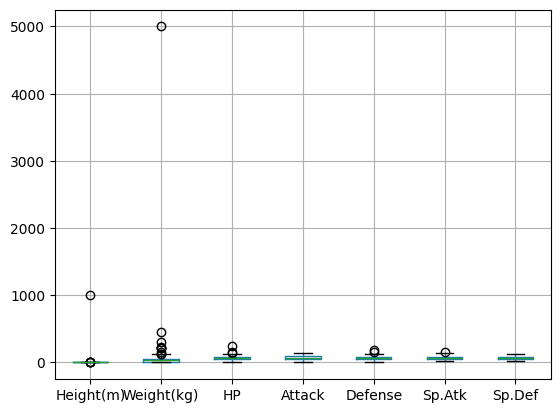

In [61]:
import matplotlib.pyplot as plt

df.boxplot(column=['Height(m)','Weight(kg)', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def'])
plt.show()

In [65]:
df[df['Height(m)']>= 1000] 

,ID,Name,Height(m),Weight(kg),HP,Attack,Defense,Sp.Atk,Sp.Def,Type
1,2,Ivysaur,1000.0,13.0,60.0,62.0,63,80,80,Grass


In [66]:
df[df['Weight(kg)']>= 5000] 

,ID,Name,Height(m),Weight(kg),HP,Attack,Defense,Sp.Atk,Sp.Def,Type
8,9,Blastoise,1.6,5000.0,79.0,83.0,100,85,105,Water


- I will use a reputable source to correct the Height and Weight https://megadexter.com/dex/pokemon

In [70]:
df.loc[1, 'Height(m)'] = 1.6
df.query('ID == 2')

,ID,Name,Height(m),Weight(kg),HP,Attack,Defense,Sp.Atk,Sp.Def,Type
1,2,Ivysaur,1.6,13.0,60.0,62.0,63,80,80,Grass


In [71]:
df.loc[8, 'Weight(kg)'] = 85.5
df.query('ID == 9')

,ID,Name,Height(m),Weight(kg),HP,Attack,Defense,Sp.Atk,Sp.Def,Type
8,9,Blastoise,1.6,85.5,79.0,83.0,100,85,105,Water


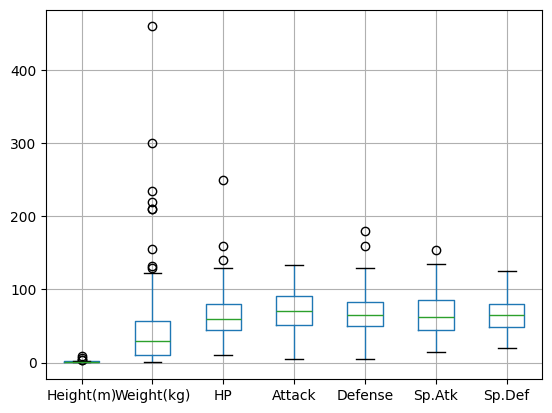

In [72]:
df.boxplot(column=['Height(m)','Weight(kg)', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def'])
plt.show()

- the rest of the values are correct so i will save the clean csv

In [73]:
pd.export_csv = df.to_csv('clean_dataset.csv', index=False)

## Analysis

### Summary statistics

In [ ]:
df.describe() #Adds mean, median(%50) ,min and max

,ID,Height(m),Weight(kg),HP,Attack,Defense,Sp.Atk,Sp.Def
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,1.204000,46.231333,63.980000,72.933333,67.913333,67.020000,65.860000
std,43.445368,0.964043,59.547388,28.533618,26.580173,26.956823,28.415534,24.129413
min,1.000000,0.200000,0.100000,10.000000,5.000000,5.000000,15.000000,20.000000
25%,38.250000,0.700000,9.925000,45.000000,52.000000,50.000000,45.000000,48.500000
50%,75.500000,1.000000,30.000000,60.000000,70.000000,65.000000,63.000000,65.000000
75%,112.750000,1.500000,56.375000,79.750000,91.500000,82.250000,85.000000,80.000000
max,150.000000,8.800000,460.000000,250.000000,134.000000,180.000000,154.000000,125.000000


In [83]:
df["Type"].mode()

0    Water
Name: Type, dtype: object

### Frequency counts of categorical variables

- I will show the the percentage of each type in the dataset

In [88]:
count = df['Type'].value_counts()
print(count)

Type
Water       28
Normal      22
Poison      14
Fire        12
Grass       12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      7
Fighting     7
Dragon       3
Ghost        3
Fairy        2
Ice          2
Name: count, dtype: int64


### Basic visualization about types

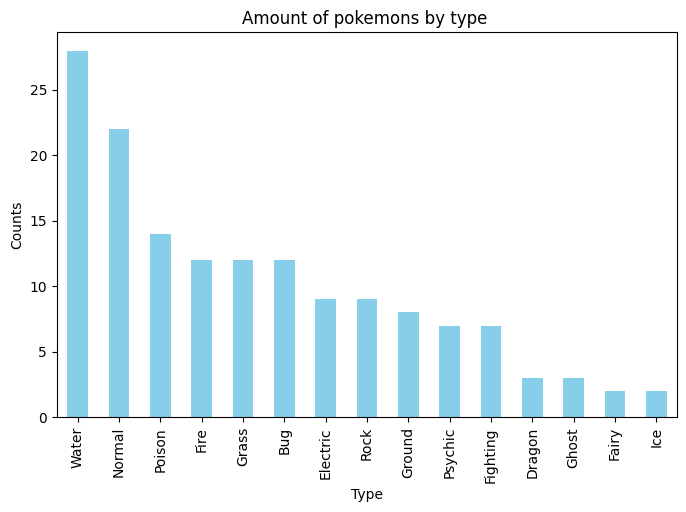

In [92]:
count.plot(kind='bar',color='skyblue',figsize=(8,5))
plt.title('Amount of pokemons by type ')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()